#Task 1:
This dataset includes scores from three test scores of students at a (fictional) public school and a variety of personal and socio-economic factors that may have interaction effects upon them.
Column description:
1.  `Gender`: Gender of the student (male/female)
2.  `EthnicGroup`: Ethnic group of the student (group A to E)
3.  `ParentEduc`: Parent(s) education background (from some_highschool to master's degree)
4.  `LunchType`: School lunch type (standard or free/reduced)
5.  `TestPrep`: Test preparation course followed (completed or none)
6.  `ParentMaritalStatus`: Parent(s) marital status (married/single/widowed/divorced)
7.  `PracticeSport`: How often the student parctice sport (never/sometimes/regularly))
8.  `IsFirstChild`: If the child is first child in the family or not (yes/no)
9.  `NrSiblings`: Number of siblings the student has (0 to 7)
10. `TransportMeans`: Means of transport to school (schoolbus/private)
11. `WklyStudyHours`: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
12. `MathScore`: math test score(0-100)
13. `ReadingScore`: reading test score(0-100)
13. `WritingScore`: writing test score(0-100)

#Download the dataset
Run the cell below

In [ ]:
!gdown 1La5PlbYWPH1VyiE8Zq2BDAYWqtpd56Z2

Downloading...
From: https://drive.google.com/uc?id=1La5PlbYWPH1VyiE8Zq2BDAYWqtpd56Z2
To: /content/Expanded_data_with_more_features.csv
100% 2.91M/2.91M [00:00<00:00, 158MB/s]


#Read the dataset

In [27]:
import pandas as pd
data = pd.read_csv('./data/Expanded_data_with_more_features.csv')

#Visualization

<Axes: ylabel='Frequency'>

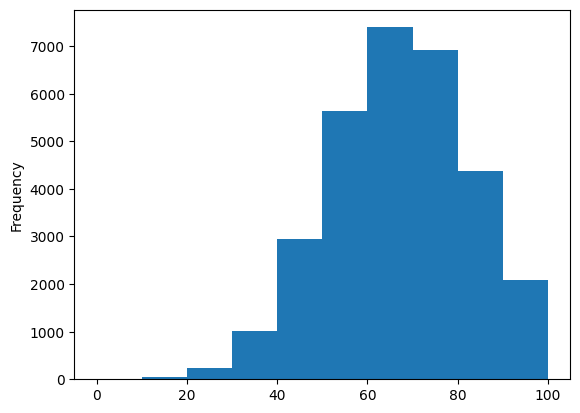

In [ ]:
data['MathScore'].plot.hist()

#Missing Values & Textual data

In [28]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [ ]:
data.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

9 columns have missing values

In [29]:
def encode_education(x):
  if type(x) == float:
    return x
  if "college" in x:
    return 1
  if "high school" in x:
    return 0
  if "associate" in x:
    return 2
  if "bachelor" in x:
    return 3
  if "master" in x:
    return 4

In [ ]:
data.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [30]:
data = data.drop(columns=['Unnamed: 0'], axis=1)

In [31]:
data['ParentEduc'].value_counts()

ParentEduc
some college          6633
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: count, dtype: int64

In [21]:
data.head()

,Gender,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,target
0,0,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,NaN
1,0,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,2.0
2,0,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,1.0
3,1,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,0.0
4,1,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,2.0


In [32]:
data['ParentEduc'] = data['ParentEduc'].apply(encode_education)

<Axes: ylabel='Frequency'>

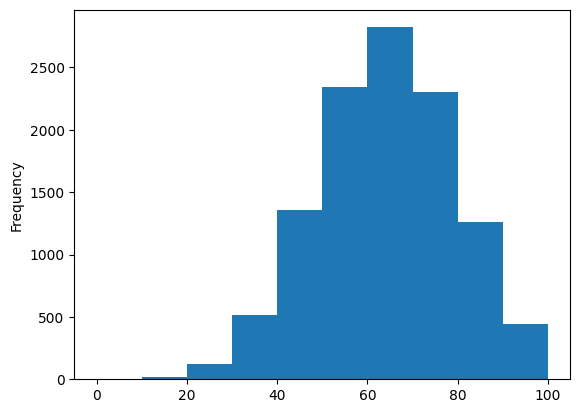

In [ ]:
data[data['ParentEduc'] == 0]['MathScore'].plot.hist()

<Axes: ylabel='Frequency'>

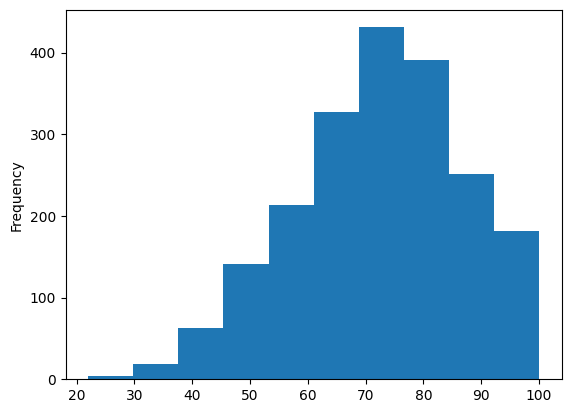

In [ ]:
data[data['ParentEduc'] == 4]['MathScore'].plot.hist()

In [ ]:
data[data['ParentEduc'] == 4]['MathScore'].describe()

count    2023.000000
mean       72.336134
std        14.699553
min        22.000000
25%        62.000000
50%        73.000000
75%        83.000000
max       100.000000
Name: MathScore, dtype: float64

In [ ]:
data[data['ParentEduc'] == 0]['MathScore'].describe()

count    11204.000000
mean        63.523920
std         15.116485
min          0.000000
25%         53.000000
50%         64.000000
75%         74.000000
max        100.000000
Name: MathScore, dtype: float64

In [ ]:
data['TransportMeans'].value_counts()

school_bus    16145
private       11362
Name: TransportMeans, dtype: int64

In [33]:
label_encode_columns = ['Gender', 'EthnicGroup']

In [34]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

In [35]:
data['target'] = encoder.fit_transform(data['EthnicGroup'])

In [36]:
data.loc[data['target'] == 5, 'target'] = np.nan

In [37]:
data['target']

0        NaN
1        2.0
2        1.0
3        0.0
4        2.0
        ... 
30636    3.0
30637    4.0
30638    NaN
30639    3.0
30640    1.0
Name: target, Length: 30641, dtype: float64

In [38]:
data = data.drop(columns='EthnicGroup')

In [39]:
data

,Gender,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,target
0,0,3.0,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,NaN
1,0,1.0,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,2.0
2,0,4.0,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,1.0
3,1,2.0,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,0.0
4,1,1.0,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,0,0.0,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65,3.0
30637,1,0.0,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51,4.0
30638,0,0.0,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67,NaN
30639,0,2.0,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93,3.0


In [40]:
def encode_lunch(x):
  if type(x) == float:
    return x
  if x == "standard":
    return 1
  else:
    return 0

In [41]:
data['LunchType'].value_counts()

LunchType
standard        19905
free/reduced    10736
Name: count, dtype: int64

In [42]:
data['LunchType'] = data['LunchType'].apply(encode_lunch)

In [ ]:
data['TestPrep'].value_counts()

none         18856
completed     9955
Name: TestPrep, dtype: int64

In [43]:
def encode_test_prep(x):
  if type(x) == float:
    return x
  if x == "completed":
    return 1
  else:
    return 0

In [44]:
data['TestPrep'] = data['TestPrep'].apply(encode_test_prep)

In [45]:
data = pd.concat([data, pd.get_dummies(data['ParentMaritalStatus'])], axis=1)

In [ ]:
data.head()

,Gender,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,target,divorced,married,single,widowed
0,0,3.0,1,0.0,married,regularly,yes,3.0,school_bus,< 5,71,71,74,NaN,0,1,0,0
1,0,1.0,1,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,2.0,0,1,0,0
2,0,4.0,1,0.0,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,1.0,0,0,1,0
3,1,2.0,0,0.0,married,never,no,1.0,NaN,5 - 10,45,56,42,0.0,0,1,0,0
4,1,1.0,1,0.0,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,2.0,0,1,0,0


In [46]:
data = data.drop(columns=['ParentMaritalStatus'])

In [47]:
def encode_practice_sport(x):
  if type(x) == float:
    return x
  if x == "never":
    return 0
  if x == "sometimes":
    return 1
  if x == "regularly":
    return 2

In [48]:
data['PracticeSport'].value_counts()

PracticeSport
sometimes    15213
regularly    10793
never         4004
Name: count, dtype: int64

In [49]:
data['PracticeSport'] = data['PracticeSport'].apply(encode_practice_sport)

In [ ]:
data.head()

,Gender,ParentEduc,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,target,divorced,married,single,widowed
0,0,3.0,1,0.0,2.0,yes,3.0,school_bus,< 5,71,71,74,NaN,0,1,0,0
1,0,1.0,1,NaN,1.0,yes,0.0,NaN,5 - 10,69,90,88,2.0,0,1,0,0
2,0,4.0,1,0.0,1.0,yes,4.0,school_bus,< 5,87,93,91,1.0,0,0,1,0
3,1,2.0,0,0.0,0.0,no,1.0,NaN,5 - 10,45,56,42,0.0,0,1,0,0
4,1,1.0,1,0.0,1.0,yes,0.0,school_bus,5 - 10,76,78,75,2.0,0,1,0,0


In [50]:
def encode_first_child(x):
  if type(x) == float:
    return x
  if x == "yes":
    return 1
  return 0

In [51]:
data['IsFirstChild'] = data['IsFirstChild'].apply(encode_first_child)

In [52]:
data['TransportMeans'].value_counts()

TransportMeans
school_bus    16145
private       11362
Name: count, dtype: int64

In [53]:
def encode_transport(x):
  if type(x) == float:
    return x
  if x == "school_bus":
    return 0
  return 1

In [54]:
data['TransportMeans'] = data['TransportMeans'].apply(encode_transport)

In [ ]:
data.head()

,Gender,ParentEduc,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,target,divorced,married,single,widowed
0,0,3.0,1,0.0,2.0,1.0,3.0,0.0,< 5,71,71,74,NaN,0,1,0,0
1,0,1.0,1,NaN,1.0,1.0,0.0,NaN,5 - 10,69,90,88,2.0,0,1,0,0
2,0,4.0,1,0.0,1.0,1.0,4.0,0.0,< 5,87,93,91,1.0,0,0,1,0
3,1,2.0,0,0.0,0.0,0.0,1.0,NaN,5 - 10,45,56,42,0.0,0,1,0,0
4,1,1.0,1,0.0,1.0,1.0,0.0,0.0,5 - 10,76,78,75,2.0,0,1,0,0


In [55]:
def encode_hours(x):
  if type(x) == float:
    return x
  if x == '< 5':
    return 0
  if x == "5 - 10":
    return 1
  return 2

In [ ]:
data['WklyStudyHours'].value_counts()

5 - 10    16246
< 5        8238
> 10       5202
Name: WklyStudyHours, dtype: int64

In [56]:
data['WklyStudyHours'] = data['WklyStudyHours'].apply(encode_hours)

In [ ]:
data.isnull().sum()

Gender               0
ParentEduc        1845
LunchType            0
TestPrep          1830
PracticeSport      631
IsFirstChild       904
NrSiblings        1572
TransportMeans    3134
WklyStudyHours     955
MathScore            0
ReadingScore         0
WritingScore         0
target            1840
divorced             0
married              0
single               0
widowed              0
dtype: int64

In [57]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
imputer = IterativeImputer()

In [59]:
data = data.dropna(subset='target', axis=0)

In [60]:
data.isnull().sum()

Gender               0
ParentEduc        1731
LunchType            0
TestPrep          1706
PracticeSport      583
IsFirstChild       852
NrSiblings        1470
TransportMeans    2947
WklyStudyHours     886
MathScore            0
ReadingScore         0
WritingScore         0
target               0
divorced             0
married              0
single               0
widowed              0
dtype: int64

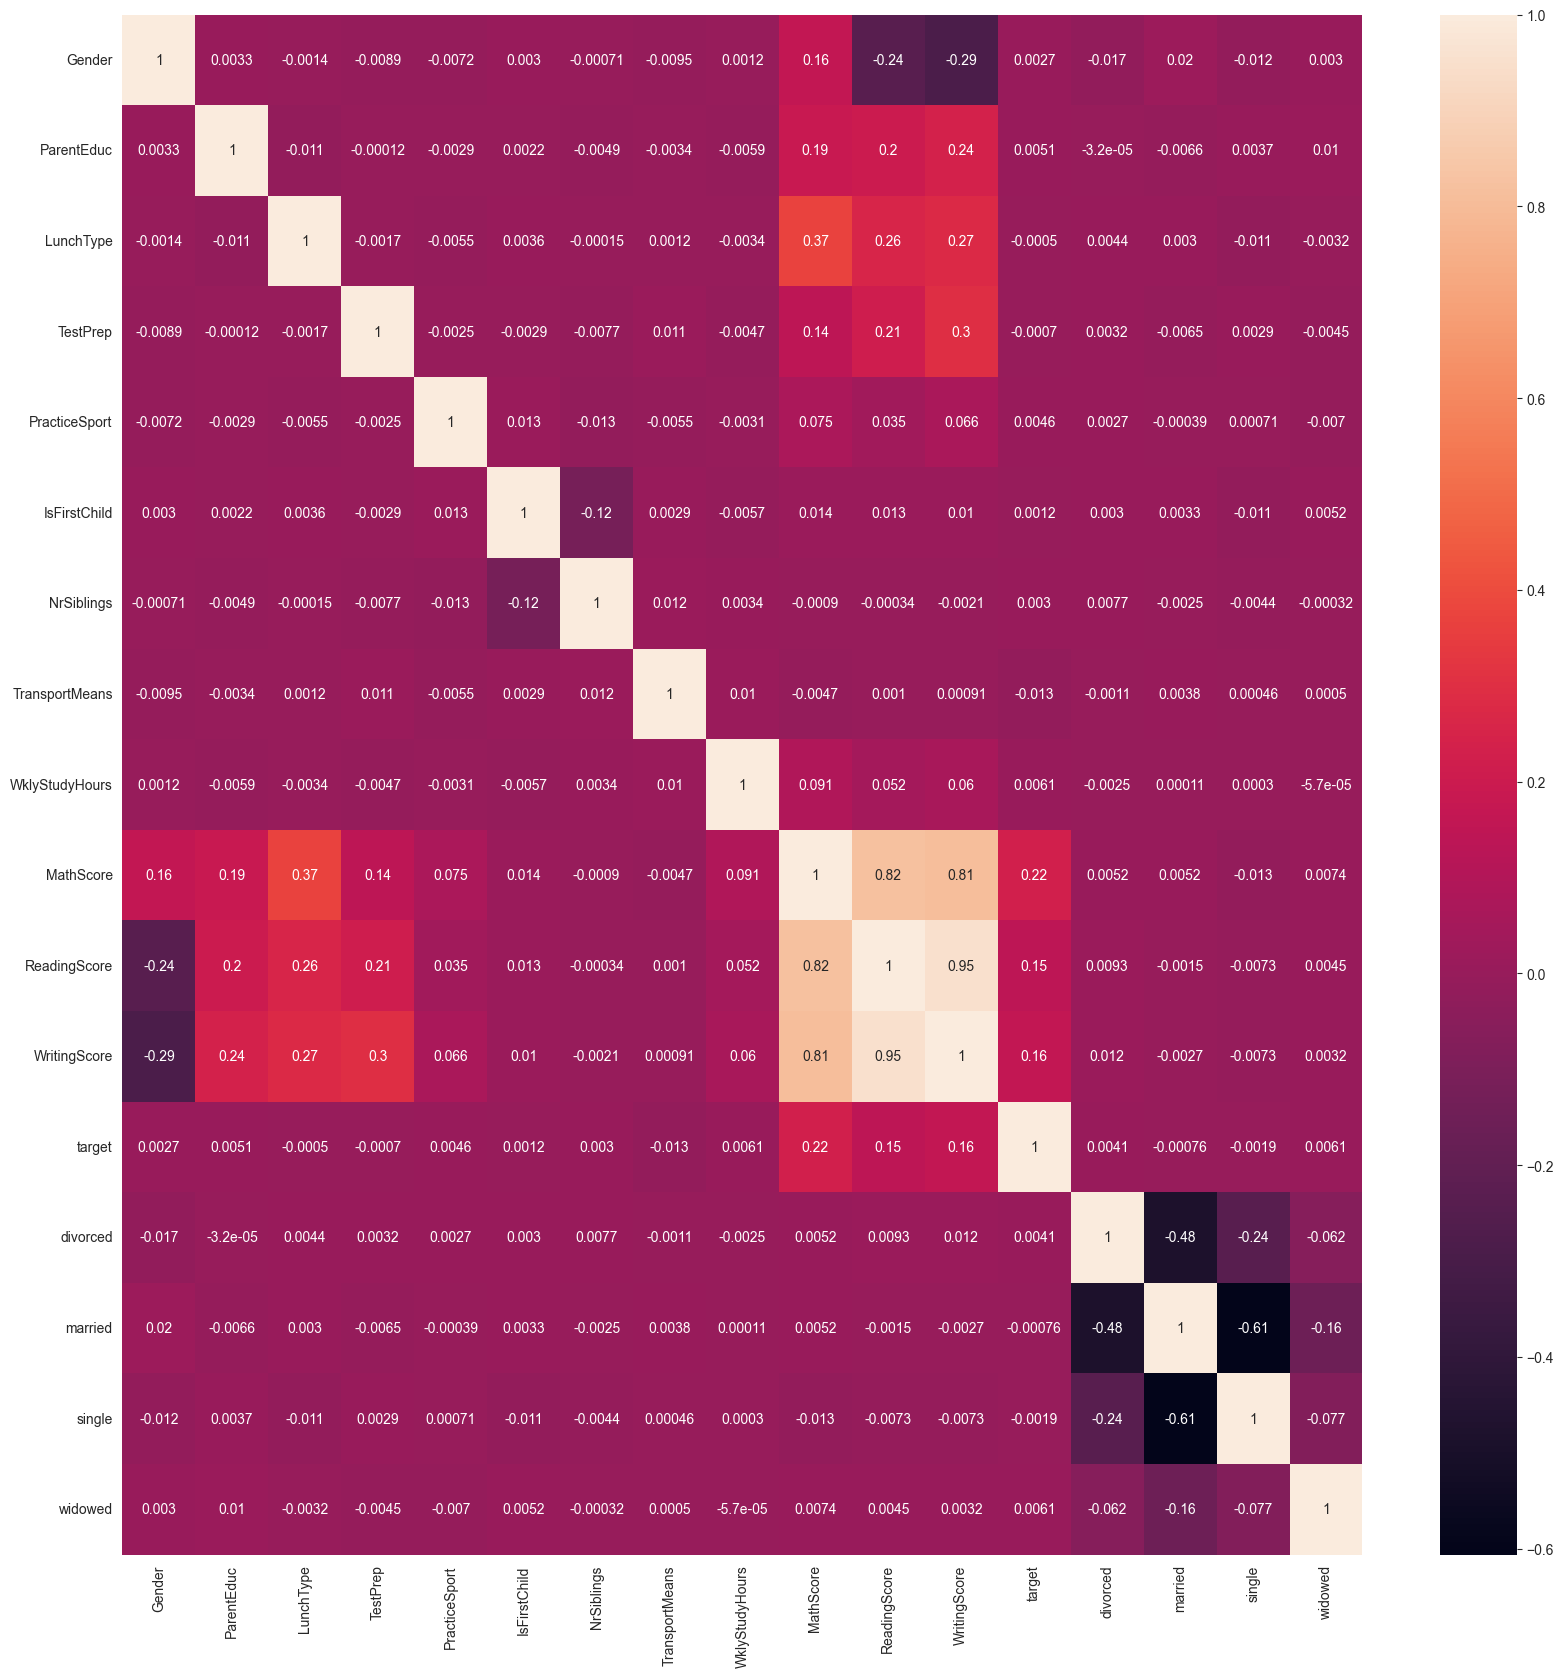

In [61]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [62]:
data.columns[:12]

Index(['Gender', 'ParentEduc', 'LunchType', 'TestPrep', 'PracticeSport',
       'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours',
       'MathScore', 'ReadingScore', 'WritingScore'],
      dtype='object')

In [63]:
colls_to_fill = data.columns[:12]

In [64]:
data[colls_to_fill] = imputer.fit_transform(data[colls_to_fill])

In [65]:
data.isnull().sum()

Gender            0
ParentEduc        0
LunchType         0
TestPrep          0
PracticeSport     0
IsFirstChild      0
NrSiblings        0
TransportMeans    0
WklyStudyHours    0
MathScore         0
ReadingScore      0
WritingScore      0
target            0
divorced          0
married           0
single            0
widowed           0
dtype: int64

In [66]:
data.head(30)

,Gender,ParentEduc,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,target,divorced,married,single,widowed
1,0.0,1.000000,1.0,0.642781,1.0,1.0,0.000000,0.419220,1.000000,69.0,90.0,88.0,2.0,False,True,False,False
2,0.0,4.000000,1.0,0.000000,1.0,1.0,4.000000,0.000000,0.000000,87.0,93.0,91.0,1.0,False,False,True,False
3,1.0,2.000000,0.0,0.000000,0.0,0.0,1.000000,0.414381,1.000000,45.0,56.0,42.0,0.0,False,True,False,False
4,1.0,1.000000,1.0,0.000000,1.0,1.0,0.000000,0.000000,1.000000,76.0,78.0,75.0,2.0,False,True,False,False
5,0.0,2.000000,1.0,0.000000,2.0,1.0,1.000000,0.000000,1.000000,73.0,84.0,79.0,1.0,False,True,False,False
6,0.0,1.000000,1.0,1.000000,0.0,0.0,1.000000,1.000000,1.000000,85.0,93.0,89.0,1.0,False,False,False,True
7,1.0,1.000000,0.0,0.000000,1.0,1.0,1.000000,1.000000,2.000000,41.0,43.0,39.0,1.0,False,True,False,False
8,1.0,0.000000,0.0,1.000000,1.0,0.0,3.000000,1.000000,2.000000,65.0,64.0,68.0,3.0,False,False,True,False
9,0.0,0.000000,0.0,0.000000,2.0,1.0,2.032617,1.000000,0.000000,37.0,59.0,50.0,1.0,False,True,False,False
10,1.0,2.000000,1.0,0.000000,1.0,1.0,1.000000,1.000000,1.000000,58.0,54.0,52.0,2.0,False,False,False,False


#Train - test split of the dataset (80:20 ratio)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X, Y = data.drop(columns=['target']), data['target']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#Model training (Use KNN, Logistic regression or Linear regression)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
len(X_train)

23040

In [ ]:
model = KNeighborsClassifier(n_neighbors=23)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=23)

In [ ]:
preds = model.predict(X_test)

In [ ]:
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

         0.0       0.08      0.00      0.01       455
         1.0       0.19      0.14      0.16      1165
         2.0       0.31      0.59      0.41      1807
         3.0       0.27      0.25      0.26      1490
         4.0       0.29      0.05      0.09       844

    accuracy                           0.28      5761
   macro avg       0.23      0.21      0.18      5761
weighted avg       0.26      0.28      0.24      5761



## Model Training XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf = XGBClassifier(n_estimators=50, max_depth=4, learning_rate = 0.0001, objective="multi:softmax", num_class=5)

In [ ]:
clf.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None, num_class=5,
              num_parallel_tree=None, ...)

In [ ]:
preds = clf.predict(X_test)

In [ ]:
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

         0.0       0.50      0.00      0.00       455
         1.0       0.15      0.00      0.00      1165
         2.0       0.34      0.77      0.47      1807
         3.0       0.33      0.30      0.31      1490
         4.0       0.45      0.15      0.23       844

    accuracy                           0.34      5761
   macro avg       0.35      0.25      0.20      5761
weighted avg       0.33      0.34      0.26      5761



## Model training CatBoost

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, metrics, cv, Pool

In [ ]:
clf = CatBoostClassifier(
    iterations = 200,
    learning_rate = 0.001,
    depth = 5,
    loss_function = "MultiClass"
)

In [ ]:
cv_params = clf.get_params()

cv_data = cv(
    Pool(X, Y),
    cv_params,
    plot=True,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]
0:	learn: 1.6092007	test: 1.6092046	best: 1.6092046 (0)	total: 19.1ms	remaining: 3.81s
1:	learn: 1.6089794	test: 1.6089854	best: 1.6089854 (1)	total: 36.8ms	remaining: 3.64s
2:	learn: 1.6087583	test: 1.6087679	best: 1.6087679 (2)	total: 55.5ms	remaining: 3.64s
3:	learn: 1.6085267	test: 1.6085419	best: 1.6085419 (3)	total: 72ms	remaining: 3.53s
4:	learn: 1.6083036	test: 1.6083238	best: 1.6083238 (4)	total: 87.9ms	remaining: 3.43s
5:	learn: 1.6080853	test: 1.6081084	best: 1.6081084 (5)	total: 105ms	remaining: 3.38s
6:	learn: 1.6078456	test: 1.6078772	best: 1.6078772 (6)	total: 120ms	remaining: 3.3s
7:	learn: 1.6076228	test: 1.6076609	best: 1.6076609 (7)	total: 136ms	remaining: 3.25s
8:	learn: 1.6073957	test: 1.6074369	best: 1.6074369 (8)	total: 152ms	remaining: 3.23s
9:	learn: 1.6071755	test: 1.6072237	best: 1.6072237 (9)	total: 174ms	remaining: 3.3s
10:	learn: 1.6069590	test: 1.6070153	best: 1.6070153 (10)	total: 190ms	remaining: 3.26s
11:	learn: 1.6067356	test: 1

In [ ]:
cv_data

,iterations,test-MultiClass-mean,test-MultiClass-std,train-MultiClass-mean,train-MultiClass-std
0,0,1.609203,0.000001,1.609201,1.040691e-06
1,1,1.608984,0.000002,1.608979,2.328758e-07
2,2,1.608769,0.000007,1.608760,5.044564e-06
3,3,1.608551,0.000011,1.608537,9.569575e-06
4,4,1.608330,0.000014,1.608312,1.116137e-05
...,...,...,...,...,...
195,195,1.572834,0.000111,1.572077,1.534360e-04
196,196,1.572675,0.000115,1.571914,1.544573e-04
197,197,1.572512,0.000120,1.571748,1.531925e-04
198,198,1.572351,0.000115,1.571583,1.542516e-04


In [ ]:
clf.fit(X_train, Y_train)

0:	learn: 1.6092080	total: 43.4ms	remaining: 8.64s
1:	learn: 1.6089721	total: 85.8ms	remaining: 8.49s
2:	learn: 1.6087520	total: 127ms	remaining: 8.34s
3:	learn: 1.6085353	total: 170ms	remaining: 8.32s
4:	learn: 1.6083066	total: 207ms	remaining: 8.05s
5:	learn: 1.6080886	total: 254ms	remaining: 8.21s
6:	learn: 1.6078596	total: 296ms	remaining: 8.17s
7:	learn: 1.6076393	total: 334ms	remaining: 8.02s
8:	learn: 1.6074138	total: 380ms	remaining: 8.07s
9:	learn: 1.6071957	total: 423ms	remaining: 8.04s
10:	learn: 1.6069812	total: 460ms	remaining: 7.91s
11:	learn: 1.6067542	total: 483ms	remaining: 7.57s
12:	learn: 1.6065269	total: 514ms	remaining: 7.39s
13:	learn: 1.6063135	total: 540ms	remaining: 7.17s
14:	learn: 1.6060979	total: 563ms	remaining: 6.94s
15:	learn: 1.6058774	total: 587ms	remaining: 6.75s
16:	learn: 1.6056570	total: 623ms	remaining: 6.7s
17:	learn: 1.6054392	total: 645ms	remaining: 6.52s
18:	learn: 1.6052236	total: 669ms	remaining: 6.38s
19:	learn: 1.6050124	total: 691ms	remain

In [ ]:
preds = clf.predict(X_test)

In [ ]:
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       446
         1.0       0.00      0.00      0.00      1176
         2.0       0.33      0.89      0.49      1848
         3.0       0.29      0.14      0.19      1517
         4.0       0.59      0.08      0.15       774

    accuracy                           0.33      5761
   macro avg       0.24      0.22      0.16      5761
weighted avg       0.26      0.33      0.23      5761



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
data = pd.read_csv('/content/Expanded_data_with_more_features.csv')

In [ ]:
data = data.drop(columns="Unnamed: 0")

In [ ]:
data.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [ ]:
data = data.dropna(subset='EthnicGroup')

In [ ]:
X, Y = data.drop(columns='EthnicGroup'), data['EthnicGroup']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
clf = CatBoostClassifier(
    iterations = 200,
    learning_rate = 0.001,
    depth = 5,
    loss_function = "MultiClass",
    cat_features = ['Gender', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'TransportMeans', 'WklyStudyHours']
)

In [ ]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(n_estimators=100, max_depth=5, num_leaves=25)

clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2061
[LightGBM] [Info] Number of data points in the train set: 23040, number of used features: 16
[LightGBM] [Info] Start training from score -2.564559
[LightGBM] [Info] Start training from score -1.600365
[LightGBM] [Info] Start training from score -1.140629
[LightGBM] [Info] Start training from score -1.347808
[LightGBM] [Info] Start training from score -1.953360
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       446
         1.0       0.28      0.04      0.07      1176
         2.0       0.35      0.67      0.46      1848
         3.0       0.41      0.38      0.39      1517
         4.0       0.44      0.37      0.40       774

    accuracy                           0.37      5761
   macro avg       0.30      0.29      0.27      5761
weighted avg       0.34      0.37      0.32      5761



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
